In [1]:
from NN_post import app, client

res = client.get("/predict")
res.get_json()

Install numpy==1.19.5...
Install successfully
----------------------
All necessary libraries are installed


[{'answer': None, 'image': None}]

In [2]:
import base64

img = None
with open("input.txt", "r") as f:
    img = f.read()

res = client.post("/predict", json={"images": f"{img}"})
print(res.get_json())

['airplane', 'truck', 'bus', 'airplane', 'truck', 'truck', 'boat', 'bus', 'boat']


In [3]:
import requests
import json

url = "http://127.0.0.1:5000/predict"
response = requests.post(url, json={"images": f"{img}"})

print("Код ответа:", response.status_code) # 200 - успешно
response = json.loads(response.text)
print(response)

Код ответа: 200
['airplane', 'truck', 'bus', 'airplane', 'truck', 'truck', 'boat', 'bus', 'boat']


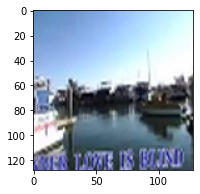

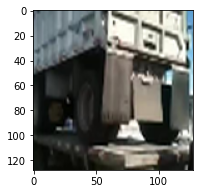

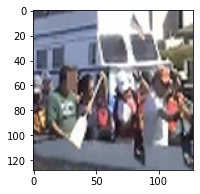

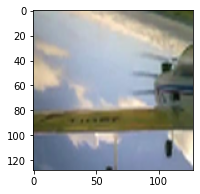

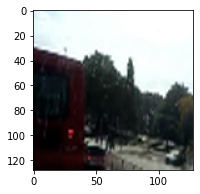

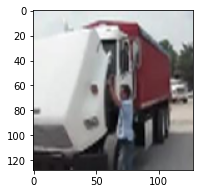

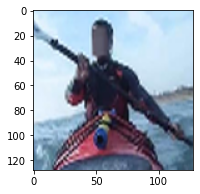

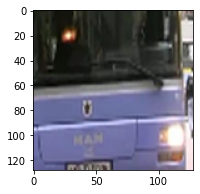

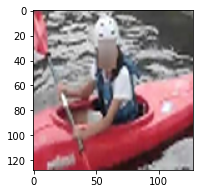

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import io
import base64
import cv2 as cv
import tensorflow.keras.applications.efficientnet as eff_net

img = None
with open("input.txt", "r") as f:
    img = f.read()

def preprocess_input_model(_image):
    import PIL
    
    _image = _image.replace("data:image/jpeg;base64,", "")
    _image = PIL.Image.open(io.BytesIO(base64.b64decode(_image)))
    
    crop_image = _image.crop((20, 30, 110, 90))
    crop_image = crop_image.resize((128, 128), PIL.Image.ANTIALIAS)
    
    crop_image = cv.cvtColor(np.array(crop_image), cv.COLOR_BGRA2BGR)
    
    return eff_net.preprocess_input(crop_image)[None, ...]

img = img.split("\n")

for i, image in enumerate(img):
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, i+1)
    plt.imshow(preprocess_input_model(image)[0, ...])